In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.options.display.max_columns = 999

In [4]:
dfa = pd.read_csv('Customer_DF.csv')
dfb = pd.read_csv('cust_transaction_details.csv')

In [5]:
dfa.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [6]:
dfb.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [7]:
dfa.drop(columns='Unnamed: 0', inplace=True)
dfb.drop(columns='Unnamed: 0', inplace=True)

In [8]:
########################################################################3

In [9]:
final = dfa[dfa['customerEmail'].isin(dfb['customerEmail'])== True]
final.reset_index(inplace=True)
final

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True
...,...,...,...,...,...,...,...,...,...,...
138,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True
139,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True
140,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True
141,166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True


In [10]:
# Menambahkan Total Transaksi pada Dataframe Final

In [11]:
Total_transaction = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==dfb['customerEmail'][j]):
            s += dfb['transactionAmount'][j]
    Total_transaction.append(s)  

In [12]:
final['Total_transaction'] = Total_transaction

In [13]:
# Menambahkan Total Transaksi yang gagal pada Dataframe Final

In [14]:
Fail_transaction = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==dfb['customerEmail'][j]):
            s += dfb['transactionFailed'][j]
    Fail_transaction.append(s)  

In [15]:
final['Fail_transaction'] = Fail_transaction

In [16]:
# Menambahkan Payment Method Registration Failure pada Dataframe Final

In [17]:
PaymentRegFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==dfb['customerEmail'][j]):
            s += dfb['paymentMethodRegistrationFailure'][j]
    PaymentRegFail.append(s)  

In [18]:
final['PaymentRegFail'] = PaymentRegFail

In [19]:
# Membuat def function untuk kolom kategorikal pada dfb

In [20]:
def col_make(column_name,category):
    isi = []
    for i in range(0,143):
        s=0
        for j in range(0,623):
            if(final['customerEmail'][i]==dfb['customerEmail'][j]):
                if dfb[column_name][j]==category:
                    s+=1
        isi.append(s)
    return isi 

In [21]:
# Menambahkan Payment Method Type pada Dataframe Final

In [22]:
dfb['paymentMethodType'].unique()

array(['card', 'bitcoin', 'apple pay', 'paypal'], dtype=object)

In [23]:
PaypalPayments = col_make('paymentMethodType','paypal')
ApplePayments = col_make('paymentMethodType','apple pay')
BitcoinPayments = col_make('paymentMethodType','bitcoin')
CardPayments = col_make('paymentMethodType','card')

In [24]:
final['PaypalPayments']= PaypalPayments
final['ApplePayments']= ApplePayments
final['CardPayments']= CardPayments
final['BitcoinPayments']= BitcoinPayments

In [25]:
# Menambahkan Payment Method Provider pada Dataframe Final

In [26]:
dfb['paymentMethodProvider'].unique()

array(['JCB 16 digit', 'American Express', 'VISA 16 digit', 'Discover',
       'Voyager', 'VISA 13 digit', 'Maestro', 'Mastercard',
       'Diners Club / Carte Blanche', 'JCB 15 digit'], dtype=object)

In [27]:
JCB_16 = col_make('paymentMethodProvider','JCB 16 digit')
AmericanExp = col_make('paymentMethodProvider','American Express')
VISA_16 = col_make('paymentMethodProvider','VISA 16 digit')
Discover = col_make('paymentMethodProvider','Discover')
Voyager = col_make('paymentMethodProvider','Voyager')
VISA_13 = col_make('paymentMethodProvider','VISA 13 digit')
Maestro = col_make('paymentMethodProvider','Maestro')
Mastercard = col_make('paymentMethodProvider','Mastercard')
DC_CB = col_make('paymentMethodProvider','Diners Club / Carte Blanche')
JCB_15= col_make('paymentMethodProvider','JCB 15 digit')

In [28]:
final['JCB_16'] = JCB_16
final['AmericanExp'] = AmericanExp 
final['VISA_16'] = VISA_16 
final['Discover'] = Discover
final['Voyager'] = Voyager 
final['VISA_13'] = VISA_13
final['Maestro'] = Maestro 
final['Mastercard'] = Mastercard
final['DC_CB'] = DC_CB 
final['JCB_15'] = JCB_15

In [29]:
# Menambahkan Order State pada Dataframe Final

In [30]:
dfb['orderState'].unique()

array(['pending', 'fulfilled', 'failed'], dtype=object)

In [31]:
OrdersFulfilled = col_make('orderState','fulfilled')
OrdersFailed =  col_make('orderState','failed')
OrdersPending = col_make('orderState','pending')

In [32]:
final['OrdersFulfilled'] = OrdersFulfilled
final['OrdersPending'] = OrdersPending
final['OrdersFailed'] = OrdersFailed

In [33]:
# Menambahkan Kolom untuk Transaksi failed tetapi order fulfilled pada Dataframe Final

In [34]:
Trns_fail_order_fulfilled = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==dfb['customerEmail'][j]):
            if (dfb['orderState'][j]=='fulfilled') & (dfb['transactionFailed'][j]==1):
                s+=1
    Trns_fail_order_fulfilled.append(s)

In [35]:
final['Trns_fail_order_fulfilled'] = Trns_fail_order_fulfilled

In [36]:
# Menambahkan kolom untuk mengecek duplikasi IP

In [37]:
Duplicate_IP = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerIPAddress'][i]==final['customerIPAddress'][j]):
            s+=1
    s-=1        
    Duplicate_IP.append(s)

In [38]:
final['Duplicate_IP'] = Duplicate_IP

In [39]:
# Menambahkan kolom untuk mengecek duplikasi Address

In [40]:
Duplicate_Address = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerBillingAddress'][i]==final['customerBillingAddress'][j]):
            s+=1
    s-=1        
    Duplicate_Address.append(s)

In [41]:
final['Duplicate_Address'] = Duplicate_Address

In [42]:
# Encoding Labelling untuk kolom Fraud

In [43]:
final['Fraud'] = final['Fraud'].map({False : 0, True : 1})

In [44]:
pd.crosstab(index=final['Fraud'], columns='Total', normalize=True)

col_0,Total
Fraud,
0,0.608392
1,0.391608


In [45]:
final.drop(columns='index',inplace=True)

In [46]:
final

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction,Fail_transaction,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,OrdersFulfilled,OrdersPending,OrdersFailed,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,44,0,2,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,111,1,1,0,0,0,3,0,2,1,0,0,0,0,0,0,0,3,0,0,1,0,0
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,131,2,0,0,0,5,0,4,0,0,1,0,0,0,0,0,0,4,0,1,2,0,0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,85,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,411,2,0,0,3,4,0,3,1,2,0,0,1,0,0,0,0,6,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,1,126,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0
139,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,1,149,1,0,0,0,6,0,0,0,0,1,5,0,0,0,0,0,6,0,0,1,0,0
140,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,1,1033,6,0,1,0,24,3,7,3,10,0,3,0,5,0,0,0,25,0,3,5,0,0
141,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,1,378,2,0,0,0,6,2,2,2,0,0,3,0,1,0,0,0,7,0,1,2,0,0


In [47]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customerEmail              143 non-null    object
 1   customerPhone              143 non-null    object
 2   customerDevice             143 non-null    object
 3   customerIPAddress          143 non-null    object
 4   customerBillingAddress     143 non-null    object
 5   No_Transactions            143 non-null    int64 
 6   No_Orders                  143 non-null    int64 
 7   No_Payments                143 non-null    int64 
 8   Fraud                      143 non-null    int64 
 9   Total_transaction          143 non-null    int64 
 10  Fail_transaction           143 non-null    int64 
 11  PaymentRegFail             143 non-null    int64 
 12  PaypalPayments             143 non-null    int64 
 13  ApplePayments              143 non-null    int64 
 14  CardPaymen

In [48]:
final.isna().sum()

customerEmail                0
customerPhone                0
customerDevice               0
customerIPAddress            0
customerBillingAddress       0
No_Transactions              0
No_Orders                    0
No_Payments                  0
Fraud                        0
Total_transaction            0
Fail_transaction             0
PaymentRegFail               0
PaypalPayments               0
ApplePayments                0
CardPayments                 0
BitcoinPayments              0
JCB_16                       0
AmericanExp                  0
VISA_16                      0
Discover                     0
Voyager                      0
VISA_13                      0
Maestro                      0
Mastercard                   0
DC_CB                        0
JCB_15                       0
OrdersFulfilled              0
OrdersPending                0
OrdersFailed                 0
Trns_fail_order_fulfilled    0
Duplicate_IP                 0
Duplicate_Address            0
dtype: i

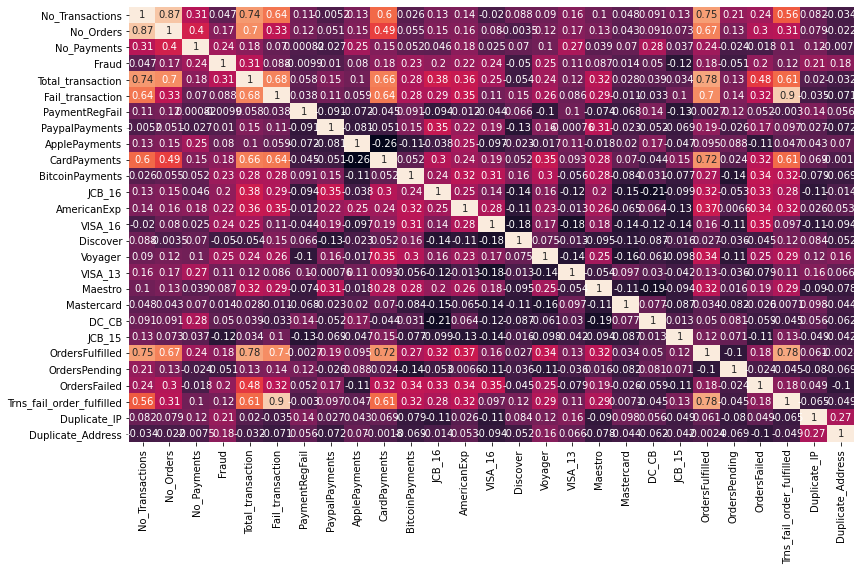

In [49]:
plt.figure(figsize=(13,8))
sns.heatmap(final.corr('spearman'), annot=True, cbar=False)
plt.show()

In [50]:
final.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction,Fail_transaction,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,OrdersFulfilled,OrdersPending,OrdersFailed,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,44,0,2,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,111,1,1,0,0,0,3,0,2,1,0,0,0,0,0,0,0,3,0,0,1,0,0
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,131,2,0,0,0,5,0,4,0,0,1,0,0,0,0,0,0,4,0,1,2,0,0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,85,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,411,2,0,0,3,4,0,3,1,2,0,0,1,0,0,0,0,6,0,1,2,0,0


In [51]:
final.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud', 'Total_transaction', 'Fail_transaction', 'PaymentRegFail',
       'PaypalPayments', 'ApplePayments', 'CardPayments', 'BitcoinPayments',
       'JCB_16', 'AmericanExp', 'VISA_16', 'Discover', 'Voyager', 'VISA_13',
       'Maestro', 'Mastercard', 'DC_CB', 'JCB_15', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed', 'Trns_fail_order_fulfilled',
       'Duplicate_IP', 'Duplicate_Address'],
      dtype='object')

# Feature Selection
- No_Transactions : Jumlah Transaksi
- No_Orders : Jumlah Orderan Barang
- No_Payments : Jumlah payments yang dilakukan
- Fraud : Customers termasuk dalam golongan Fraud atau Non-Fraud **(Target)**
- Total_transaction : Total transaksi yang terjadi pada customer tersebut
- Fail_transaction : Total transaksi yang gagal pada customer tersebut
- PaymentRegFail : Total payment yang gagal diregistrasi
- PaypalPayments : Pembayaran menggunakan Paypal
- ApplePayments : Pembayaran menggunakan Apple
- CardPayments : Pembayaran menggunakan Card
- BitcoinPayments : Pembayaran menggunakan Bitcoin
- JCB_16 : Metode Provider yang digunakan untuk pembayaran menggunakan JCB_16
- AmericanExp : Metode Provider yang digunakan untuk pembayaran menggunakan AmericanExp
- VISA_16 : Metode Provider yang digunakan untuk pembayaran menggunakan VISA_16
- Discover : Metode Provider yang digunakan untuk pembayaran menggunakan Discover
- Voyager : Metode Provider yang digunakan untuk pembayaran menggunakan Voyager
- VISA_13 : Metode Provider yang digunakan untuk pembayaran menggunakan VISA_13
- Maestro : Metode Provider yang digunakan untuk pembayaran menggunakan Maestro
- Mastercard : Metode Provider yang digunakan untuk pembayaran menggunakan Mastercard
- DC_CB : Metode Provider yang digunakan untuk pembayaran menggunakan DC_CB
- JCB_15 : Metode Provider yang digunakan untuk pembayaran menggunakan JCB_15
- OrdersFulfilled : Order yang sudah terpenuhi / selesai
- OrdersPending : Order yang masih dalam status pending
- OrdersFailed : Order ynag sudah gagal
- Trns_fail_order_fulfilled : Order yang gagal tetapi statusnya sudah terpenuhi / selesai
- Duplicate_IP : IP yang terduplikat pada Customers
- Duplicate_Address : Address yang terduplikat pada Customers

In [52]:
df = final[['No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud', 'Total_transaction', 'Fail_transaction', 'PaymentRegFail',
       'PaypalPayments', 'ApplePayments', 'CardPayments', 'BitcoinPayments',
       'JCB_16', 'AmericanExp', 'VISA_16', 'Discover', 'Voyager', 'VISA_13',
       'Maestro', 'Mastercard', 'DC_CB', 'JCB_15', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed', 'Trns_fail_order_fulfilled',
       'Duplicate_IP', 'Duplicate_Address']]

In [53]:
df.head()

,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction,Fail_transaction,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,OrdersFulfilled,OrdersPending,OrdersFailed,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address
0,2,2,1,0,44,0,2,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,3,3,7,1,111,1,1,0,0,0,3,0,2,1,0,0,0,0,0,0,0,3,0,0,1,0,0
2,5,3,2,0,131,2,0,0,0,5,0,4,0,0,1,0,0,0,0,0,0,4,0,1,2,0,0
3,3,3,1,0,85,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,0
4,7,7,6,1,411,2,0,0,3,4,0,3,1,2,0,0,1,0,0,0,0,6,0,1,2,0,0


In [54]:
# Splitting Data

In [55]:
X = df.drop(columns='Fraud')
y = df['Fraud']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

In [57]:
# Function Evaluation Matrix

In [58]:
# Evaluation Matrix Function
def Eva_Matrix1(Model, X_train, y_train, X_test, y_test, Name):
    y_pred_train = Model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_train = recall_score(y_train, y_pred_train)
    prec_train = precision_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    y_pred_test = Model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    f1_test = f1_score(y_train, y_pred_train)
    data = {
        f"Training {Name}" : [acc_train, rec_train, prec_train, f1_train],
        f"Test {Name}" : [acc_test, rec_test, prec_test, f1_test]
    }
    df = pd.DataFrame(data=data, index=['Accuracy', 'Recall', 'Precision', 'F1'])
    return df

# Pipeline

In [59]:
num_columns = ['No_Transactions', 'No_Orders', 'No_Payments',
       'Total_transaction', 'Fail_transaction', 'PaymentRegFail',
       'PaypalPayments', 'ApplePayments', 'CardPayments', 'BitcoinPayments',
       'JCB_16', 'AmericanExp', 'VISA_16', 'Discover', 'Voyager', 'VISA_13',
       'Maestro', 'Mastercard', 'DC_CB', 'JCB_15', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed', 'Trns_fail_order_fulfilled',
       'Duplicate_IP', 'Duplicate_Address']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
    #('poly', PolynomialFeatures(degree=3, include_bias=False)),
    #('power', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns)
])

pipeSVM = Pipeline([
    ("prep", preprocessor),
    ("algo", SVC(max_iter=400, probability=True))
])

pipeLR = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression())
])

pipeKNN = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])
               
pipeDT = Pipeline([
    ("prep", preprocessor),
    ("algo", DecisionTreeClassifier())
])
            
pipeRF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

# KNeigborsClassifier

In [60]:
pipeKNN.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['No_Transactions',
                                                   'No_Orders', 'No_Payments',
                                                   'Total_transaction',
                                                   'Fail_transaction',
                                                   'PaymentRegFail',
                                                   'PaypalPayments',
                                                   'ApplePayments',
                                                   'CardPayments',
                       

In [61]:
y_KNN_test = pipeKNN.predict(X_test)

In [62]:
df_KNN = Eva_Matrix1(pipeKNN, X_train, y_train, X_test, y_test, "Pipeline KNN")
df_KNN

,Training Pipeline KNN,Test Pipeline KNN
Accuracy,0.789474,0.689655
Recall,0.577778,0.272727
Precision,0.838710,0.750000
F1,0.684211,0.684211


              precision    recall  f1-score   support

           0       0.68      0.94      0.79        18
           1       0.75      0.27      0.40        11

    accuracy                           0.69        29
   macro avg       0.72      0.61      0.60        29
weighted avg       0.71      0.69      0.64        29



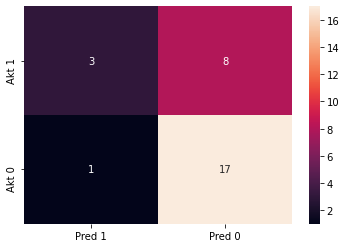

In [63]:
print(classification_report(y_test, y_KNN_test))
cm_KNN_test = confusion_matrix(y_test, y_KNN_test, labels = [1,0])
df_KNN_test = pd.DataFrame(data=cm_KNN_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_test, annot=True)
plt.show()

# LogisticRegression

In [64]:
pipeLR.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['No_Transactions',
                                                   'No_Orders', 'No_Payments',
                                                   'Total_transaction',
                                                   'Fail_transaction',
                                                   'PaymentRegFail',
                                                   'PaypalPayments',
                                                   'ApplePayments',
                                                   'CardPayments',
                       

In [65]:
y_LR_test = pipeLR.predict(X_test)

In [66]:
df_LR = Eva_Matrix1(pipeLR, X_train, y_train, X_test, y_test, "Pipeline LR")
df_LR

,Training Pipeline LR,Test Pipeline LR
Accuracy,0.815789,0.758621
Recall,0.688889,0.363636
Precision,0.815789,1.000000
F1,0.746988,0.746988


              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      0.36      0.53        11

    accuracy                           0.76        29
   macro avg       0.86      0.68      0.69        29
weighted avg       0.83      0.76      0.72        29



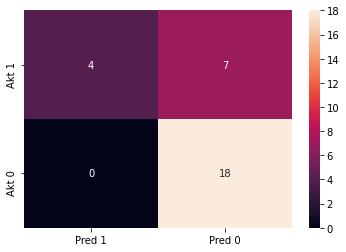

In [67]:
print(classification_report(y_test, y_LR_test))
cm_LR_test = confusion_matrix(y_test, y_LR_test, labels = [1,0])
df_LR_test = pd.DataFrame(data=cm_LR_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_LR_test, annot=True)
plt.show()

# SVM

In [68]:
pipeSVM.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['No_Transactions',
                                                   'No_Orders', 'No_Payments',
                                                   'Total_transaction',
                                                   'Fail_transaction',
                                                   'PaymentRegFail',
                                                   'PaypalPayments',
                                                   'ApplePayments',
                                                   'CardPayments',
                       

In [69]:
y_SVM_test = pipeSVM.predict(X_test)

In [70]:
df_SVM = Eva_Matrix1(pipeSVM, X_train, y_train, X_test, y_test, "Pipeline SVM")
df_SVM

,Training Pipeline SVM,Test Pipeline SVM
Accuracy,0.833333,0.689655
Recall,0.577778,0.272727
Precision,1.000000,0.750000
F1,0.732394,0.732394


              precision    recall  f1-score   support

           0       0.68      0.94      0.79        18
           1       0.75      0.27      0.40        11

    accuracy                           0.69        29
   macro avg       0.72      0.61      0.60        29
weighted avg       0.71      0.69      0.64        29



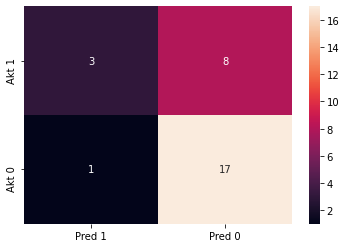

In [71]:
print(classification_report(y_test, y_SVM_test))
cm_SVM_test = confusion_matrix(y_test, y_SVM_test, labels = [1,0])
df_SVM_test = pd.DataFrame(data=cm_SVM_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_SVM_test, annot=True)
plt.show()

# DecisionTreeClassifier

In [72]:
pipeDT.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['No_Transactions',
                                                   'No_Orders', 'No_Payments',
                                                   'Total_transaction',
                                                   'Fail_transaction',
                                                   'PaymentRegFail',
                                                   'PaypalPayments',
                                                   'ApplePayments',
                                                   'CardPayments',
                       

In [73]:
y_DT_test = pipeDT.predict(X_test)

In [74]:
df_DT = Eva_Matrix1(pipeDT, X_train, y_train, X_test, y_test, "Pipeline DT")
df_DT

,Training Pipeline DT,Test Pipeline DT
Accuracy,1.0,0.551724
Recall,1.0,0.454545
Precision,1.0,0.416667
F1,1.0,1.000000


              precision    recall  f1-score   support

           0       0.65      0.61      0.63        18
           1       0.42      0.45      0.43        11

    accuracy                           0.55        29
   macro avg       0.53      0.53      0.53        29
weighted avg       0.56      0.55      0.56        29



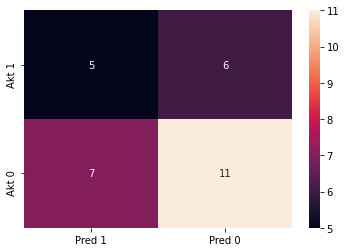

In [75]:
print(classification_report(y_test, y_DT_test))
cm_DT_test = confusion_matrix(y_test, y_DT_test, labels = [1,0])
df_DT_test = pd.DataFrame(data=cm_DT_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_test, annot=True)
plt.show()

# RandomForestClassifier

In [76]:
pipeRF.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['No_Transactions',
                                                   'No_Orders', 'No_Payments',
                                                   'Total_transaction',
                                                   'Fail_transaction',
                                                   'PaymentRegFail',
                                                   'PaypalPayments',
                                                   'ApplePayments',
                                                   'CardPayments',
                       

In [77]:
y_RF_test = pipeRF.predict(X_test)

In [78]:
df_RF = Eva_Matrix1(pipeRF, X_train, y_train, X_test, y_test, "Pipeline RF")
df_RF

,Training Pipeline RF,Test Pipeline RF
Accuracy,1.0,0.724138
Recall,1.0,0.454545
Precision,1.0,0.714286
F1,1.0,1.000000


              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.71      0.45      0.56        11

    accuracy                           0.72        29
   macro avg       0.72      0.67      0.68        29
weighted avg       0.72      0.72      0.71        29



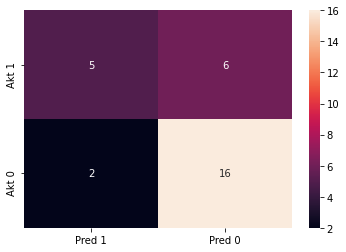

In [79]:
print(classification_report(y_test, y_RF_test))
cm_RF_test = confusion_matrix(y_test, y_RF_test, labels = [1,0])
df_RF_test = pd.DataFrame(data=cm_RF_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_test, annot=True)
plt.show()

### =======================================================================

# Improvement Algoritma (Hyper Parameter Tuning)

## KNN (Hyper Parameter Tuning)

In [80]:
param_KNN = {
    "algo__n_neighbors" : np.arange(1, 51, 2),
    "algo__p" : [1, 2],
    "algo__weights" : ['uniform', 'distance']
}

In [81]:
skf = StratifiedKFold(n_splits = 3, random_state = 42)

In [82]:
KNN_GS = GridSearchCV(pipeKNN, param_KNN, cv = skf, scoring = 'balanced_accuracy', n_jobs = -1, verbose = 1)

In [83]:
KNN_GS.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['No_Transactions',
                                                                          'No_Orders',
                                                                          'No_Payments',
                                                                          'Total_transaction',
         

In [84]:
KNN_Tuned = KNN_GS.best_estimator_

In [85]:
y_train_KNN_Tuned = KNN_Tuned.predict(X_train)
y_test_KNN_Tuned = KNN_Tuned.predict(X_test)

In [86]:
df_KNN_Tuned = Eva_Matrix1(KNN_Tuned, X_train, y_train, X_test, y_test, "Pipeline KNN Tuned")
df_KNN_Tuned

,Training Pipeline KNN Tuned,Test Pipeline KNN Tuned
Accuracy,0.728070,0.689655
Recall,0.333333,0.363636
Precision,0.937500,0.666667
F1,0.491803,0.491803


              precision    recall  f1-score   support

           0       0.70      0.89      0.78        18
           1       0.67      0.36      0.47        11

    accuracy                           0.69        29
   macro avg       0.68      0.63      0.63        29
weighted avg       0.68      0.69      0.66        29



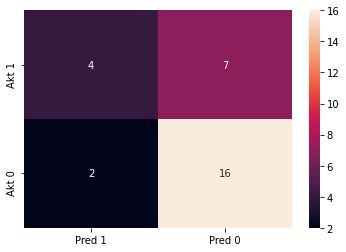

In [87]:
print(classification_report(y_test, y_test_KNN_Tuned))
cm_KNN_tuned_test = confusion_matrix(y_test, y_test_KNN_Tuned, labels = [1,0])
df_KNN_tuned_test = pd.DataFrame(data=cm_KNN_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_tuned_test, annot=True)
plt.show()

## LogisticRegression (Hyper Parameter Tuning)

In [88]:
param_LR = {
    "algo__C" : np.logspace(-3, 3, 7),
    "algo__penalty" : ['l1', 'l2', 'elasticnet']
}

In [89]:
skf = StratifiedKFold(n_splits = 3, random_state = 42)

In [90]:
LR_GS = GridSearchCV(pipeLR, param_LR, cv = skf, scoring = 'balanced_accuracy', n_jobs = -1, verbose = 1)

In [91]:
LR_GS.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  63 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    0.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['No_Transactions',
                                                                          'No_Orders',
                                                                          'No_Payments',
                                                                          'Total_transaction',
         

In [92]:
LR_Tuned = LR_GS.best_estimator_

In [93]:
y_train_LR_Tuned = LR_Tuned.predict(X_train)
y_test_LR_Tuned = LR_Tuned.predict(X_test)

In [94]:
df_LR_Tuned = Eva_Matrix1(LR_Tuned, X_train, y_train, X_test, y_test, "Pipeline LR Tuned")
df_LR_Tuned

,Training Pipeline LR Tuned,Test Pipeline LR Tuned
Accuracy,0.842105,0.758621
Recall,0.755556,0.454545
Precision,0.829268,0.833333
F1,0.790698,0.790698


              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.83      0.45      0.59        11

    accuracy                           0.76        29
   macro avg       0.79      0.70      0.71        29
weighted avg       0.77      0.76      0.74        29



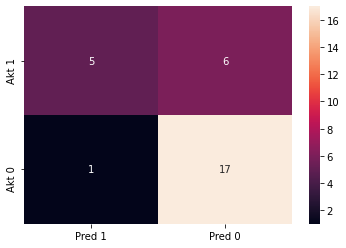

In [95]:
print(classification_report(y_test, y_test_LR_Tuned))
cm_LR_tuned_test = confusion_matrix(y_test, y_test_LR_Tuned, labels = [1,0])
df_LR_tuned_test = pd.DataFrame(data=cm_LR_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_LR_tuned_test, annot=True)
plt.show()

## SVM (Hyper Parameter Tuning)

In [96]:
param_SVM = {
    'algo__C' : np.logspace(-3,3,7),
    'algo__gamma' : np.arange(10, 101, 10),
    'algo__class_weight' : [{0 : 0.4, 1 : 0.6}, 'balanced', {0 : 0.3, 1 : 0.7}]
}

In [97]:
skf = StratifiedKFold(n_splits = 3, random_state = 42)

In [98]:
SVM_GS = GridSearchCV(pipeSVM, param_SVM, cv = skf, scoring = 'balanced_accuracy', n_jobs = -1, verbose = 1)

In [99]:
SVM_GS.fit(X_train, y_train)

Fitting 3 folds for each of 210 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:   14.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['No_Transactions',
                                                                          'No_Orders',
                                                                          'No_Payments',
                                                                          'Total_transaction',
         

In [100]:
SVM_Tuned = SVM_GS.best_estimator_

In [101]:
y_train_SVM_Tuned = SVM_Tuned.predict(X_train)
y_test_SVM_Tuned = SVM_Tuned.predict(X_test)

In [102]:
df_SVM_Tuned = Eva_Matrix1(SVM_Tuned, X_train, y_train, X_test, y_test, "Pipeline SVM Tuned")
df_SVM_Tuned

,Training Pipeline SVM Tuned,Test Pipeline SVM Tuned
Accuracy,0.605263,0.62069
Recall,0.000000,0.00000
Precision,0.000000,0.00000
F1,0.000000,0.00000


              precision    recall  f1-score   support

           0       0.62      1.00      0.77        18
           1       0.00      0.00      0.00        11

    accuracy                           0.62        29
   macro avg       0.31      0.50      0.38        29
weighted avg       0.39      0.62      0.48        29



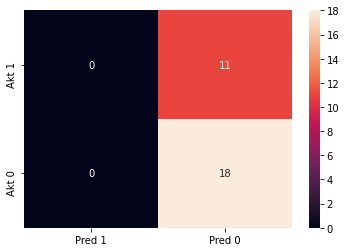

In [103]:
print(classification_report(y_test, y_test_SVM_Tuned))
cm_SVM_tuned_test = confusion_matrix(y_test, y_test_SVM_Tuned, labels = [1,0])
df_SVM_tuned_test = pd.DataFrame(data=cm_SVM_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_SVM_tuned_test, annot=True)
plt.show()

## DecisionTreeClassifier (Hyper Parameter Tuning)

In [104]:
param_DT = {
    "algo__max_depth" : [None, 5, 10, 15],
    "algo__min_samples_leaf" : np.arange(1, 20, 5),
    "algo__max_features" : np.arange(0, 1.1, 0.3)
}

In [105]:
skf = StratifiedKFold(n_splits = 3, random_state = 42)

In [106]:
DT_GS = GridSearchCV(pipeDT, param_DT, cv = skf, scoring = 'balanced_accuracy', n_jobs = -1, verbose = 1)

In [107]:
DT_GS.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    2.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['No_Transactions',
                                                                          'No_Orders',
                                                                          'No_Payments',
                                                                          'Total_transaction',
         

In [108]:
DT_GS.best_params_

{'algo__max_depth': 5, 'algo__max_features': 0.6, 'algo__min_samples_leaf': 1}

In [109]:
DT_Tuned = DT_GS.best_estimator_

In [110]:
y_train_DT_Tuned = DT_Tuned.predict(X_train)
y_test_DT_Tuned = DT_Tuned.predict(X_test)

In [111]:
df_DT_Tuned = Eva_Matrix1(DT_Tuned, X_train, y_train, X_test, y_test, "Pipeline DT Tuned")
df_DT_Tuned

,Training Pipeline DT Tuned,Test Pipeline DT Tuned
Accuracy,0.894737,0.758621
Recall,0.733333,0.454545
Precision,1.000000,0.833333
F1,0.846154,0.846154


              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.83      0.45      0.59        11

    accuracy                           0.76        29
   macro avg       0.79      0.70      0.71        29
weighted avg       0.77      0.76      0.74        29



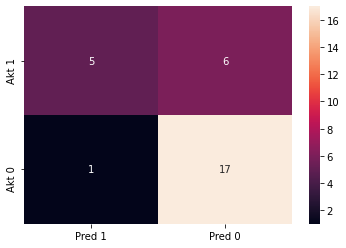

In [112]:
print(classification_report(y_test, y_test_DT_Tuned))
cm_DT_tuned_test = confusion_matrix(y_test, y_test_DT_Tuned, labels = [1,0])
df_DT_tuned_test = pd.DataFrame(data=cm_DT_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_tuned_test, annot=True)
plt.show()

## RandomForestClassifier (Hyper Parameter Tuning)

In [113]:
param_RF = {
    "algo__n_estimators" : np.arange(100, 301, 100), # ada 3
    "algo__max_depth" : [None, 5, 10], # ada 4
    "algo__min_samples_leaf" : np.arange(1, 12, 5), # ada 4
    "algo__max_features" : [0.3, 0.5, 0.7, 0.8] # ada 4
}

In [114]:
skf = StratifiedKFold(n_splits = 3, random_state = 42)

In [115]:
RF_GS = GridSearchCV(pipeRF, param_RF, cv = skf, scoring = 'balanced_accuracy', n_jobs = -1, verbose = 1)

In [116]:
RF_GS.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['No_Transactions',
                                                                          'No_Orders',
                                                                          'No_Payments',
                                                                          'Total_transaction',
         

In [117]:
RF_Tuned = RF_GS.best_estimator_

In [118]:
y_train_RF_Tuned = RF_Tuned.predict(X_train)
y_test_RF_Tuned = RF_Tuned.predict(X_test)

In [119]:
df_RF_Tuned = Eva_Matrix1(RF_Tuned, X_train, y_train, X_test, y_test, "Pipeline RF Tuned")
df_RF_Tuned

,Training Pipeline RF Tuned,Test Pipeline RF Tuned
Accuracy,0.991228,0.620690
Recall,0.977778,0.454545
Precision,1.000000,0.500000
F1,0.988764,0.988764


              precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.50      0.45      0.48        11

    accuracy                           0.62        29
   macro avg       0.59      0.59      0.59        29
weighted avg       0.61      0.62      0.62        29



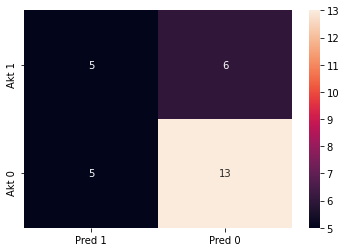

In [120]:
print(classification_report(y_test, y_test_RF_Tuned))
cm_RF_tuned_test = confusion_matrix(y_test, y_test_RF_Tuned, labels = [1,0])
df_RF_tuned_test = pd.DataFrame(data=cm_RF_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_tuned_test, annot=True)
plt.show()

### ==============================================================

# Improvement Algoritma (Fine Tuning)

## DecisionTreeClassifier (Fine Tuning)

In [121]:
pipeDT_Tuning = Pipeline([
    ("prep", preprocessor),
    ("algo", DecisionTreeClassifier(max_depth = 3, max_features = 0.4, min_samples_leaf = 1, min_samples_split = 2, random_state=42))
])

In [122]:
pipeDT_Tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['No_Transactions',
                                                   'No_Orders', 'No_Payments',
                                                   'Total_transaction',
                                                   'Fail_transaction',
                                                   'PaymentRegFail',
                                                   'PaypalPayments',
                                                   'ApplePayments',
                                                   'CardPayments',
                       

In [123]:
y_train_DT_Fine_Tuned = pipeDT_Tuning.predict(X_train)
y_test_DT_Fine_Tuned = pipeDT_Tuning.predict(X_test)

In [124]:
df_DT_Fine_Tuned = Eva_Matrix1(pipeDT_Tuning, X_train, y_train, X_test, y_test, "Pipeline DT Fine Tuning")
df_DT_Fine_Tuned

,Training Pipeline DT Fine Tuning,Test Pipeline DT Fine Tuning
Accuracy,0.815789,0.793103
Recall,0.600000,0.454545
Precision,0.900000,1.000000
F1,0.720000,0.720000


              precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       1.00      0.45      0.62        11

    accuracy                           0.79        29
   macro avg       0.88      0.73      0.74        29
weighted avg       0.84      0.79      0.77        29



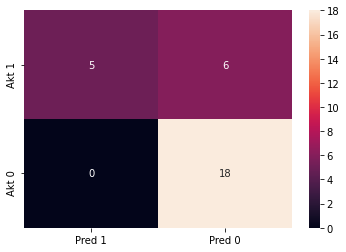

In [125]:
print(classification_report(y_test, y_test_DT_Fine_Tuned))
cm_DT_Fine_tuned_test = confusion_matrix(y_test, y_test_DT_Fine_Tuned, labels = [1,0])
df_DT_Fine_tuned_test = pd.DataFrame(data=cm_DT_Fine_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_Fine_tuned_test, annot=True)
plt.show()

## KNN (Fine Tuning)

In [126]:
pipeKNN_Tuning = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier(n_neighbors = 2, p = 2, weights = 'uniform'))
])

In [127]:
pipeKNN_Tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['No_Transactions',
                                                   'No_Orders', 'No_Payments',
                                                   'Total_transaction',
                                                   'Fail_transaction',
                                                   'PaymentRegFail',
                                                   'PaypalPayments',
                                                   'ApplePayments',
                                                   'CardPayments',
                       

In [128]:
y_train_KNN_Fine_Tuned = pipeKNN_Tuning.predict(X_train)
y_test_KNN_Fine_Tuned = pipeKNN_Tuning.predict(X_test)

In [129]:
df_KNN_Fine_Tuned = Eva_Matrix1(pipeKNN_Tuning, X_train, y_train, X_test, y_test, "Pipeline KN Fine Tuning")
df_KNN_Fine_Tuned

,Training Pipeline KN Fine Tuning,Test Pipeline KN Fine Tuning
Accuracy,0.789474,0.758621
Recall,0.466667,0.363636
Precision,1.000000,1.000000
F1,0.636364,0.636364


              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      0.36      0.53        11

    accuracy                           0.76        29
   macro avg       0.86      0.68      0.69        29
weighted avg       0.83      0.76      0.72        29



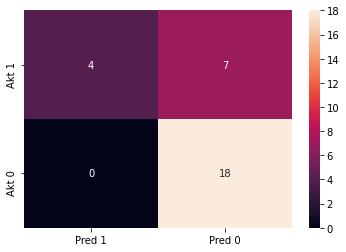

In [130]:
print(classification_report(y_test, y_test_KNN_Fine_Tuned))
cm_KNN_Fine_tuned_test = confusion_matrix(y_test, y_test_KNN_Fine_Tuned, labels = [1,0])
df_KNN_Fine_tuned_test = pd.DataFrame(data=cm_KNN_Fine_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_Fine_tuned_test, annot=True)
plt.show()

## SVM (Fine Tuning)

In [189]:
pipeSVM_Tuning = Pipeline([
    ("prep", preprocessor),
    ("algo", SVC(max_iter=400, probability=True, kernel='linear', C = 1.4, gamma = 10, class_weight = {0 : 0.4, 1 : 0.6}))
])

In [190]:
pipeSVM_Tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['No_Transactions',
                                                   'No_Orders', 'No_Payments',
                                                   'Total_transaction',
                                                   'Fail_transaction',
                                                   'PaymentRegFail',
                                                   'PaypalPayments',
                                                   'ApplePayments',
                                                   'CardPayments',
                       

In [191]:
y_train_SVM_Fine_Tuned = pipeSVM_Tuning.predict(X_train)
y_test_SVM_Fine_Tuned = pipeSVM_Tuning.predict(X_test)

In [192]:
df_SVM_Fine_Tuned = Eva_Matrix1(pipeSVM_Tuning, X_train, y_train, X_test, y_test, "Pipeline SVM Fine Tuning")
df_SVM_Fine_Tuned

,Training Pipeline SVM Fine Tuning,Test Pipeline SVM Fine Tuning
Accuracy,0.824561,0.827586
Recall,0.800000,0.545455
Precision,0.765957,1.000000
F1,0.782609,0.782609


              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.55      0.71        11

    accuracy                           0.83        29
   macro avg       0.89      0.77      0.79        29
weighted avg       0.87      0.83      0.81        29



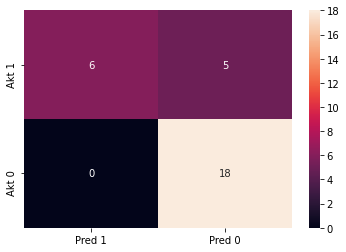

In [193]:
print(classification_report(y_test, y_test_SVM_Fine_Tuned))
cm_SVM_Fine_tuned_test = confusion_matrix(y_test, y_test_SVM_Fine_Tuned, labels = [1,0])
df_SVM_Fine_tuned_test = pd.DataFrame(data=cm_SVM_Fine_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_SVM_Fine_tuned_test, annot=True)
plt.show()

## RandomForestClassifier (Fine Tuning)

In [136]:
pipeRF_Tuning = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 3, min_samples_split = 6, class_weight = {0 : 0.45, 1 : 0.55}, random_state=42))
])

In [137]:
pipeRF_Tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['No_Transactions',
                                                   'No_Orders', 'No_Payments',
                                                   'Total_transaction',
                                                   'Fail_transaction',
                                                   'PaymentRegFail',
                                                   'PaypalPayments',
                                                   'ApplePayments',
                                                   'CardPayments',
                       

In [138]:
y_train_RF_Fine_Tuned = pipeRF_Tuning.predict(X_train)
y_test_RF_Fine_Tuned = pipeRF_Tuning.predict(X_test)

In [139]:
df_RF_Fine_Tuned = Eva_Matrix1(pipeRF_Tuning, X_train, y_train, X_test, y_test, "Pipeline RF Fine Tuning")
df_RF_Fine_Tuned

,Training Pipeline RF Fine Tuning,Test Pipeline RF Fine Tuning
Accuracy,0.833333,0.758621
Recall,0.600000,0.454545
Precision,0.964286,0.833333
F1,0.739726,0.739726


              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.83      0.45      0.59        11

    accuracy                           0.76        29
   macro avg       0.79      0.70      0.71        29
weighted avg       0.77      0.76      0.74        29



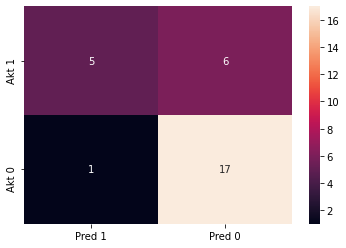

In [140]:
print(classification_report(y_test, y_test_RF_Fine_Tuned))
cm_RF_Fine_tuned_test = confusion_matrix(y_test, y_test_RF_Fine_Tuned, labels = [1,0])
df_RF_Fine_tuned_test = pd.DataFrame(data=cm_RF_Fine_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_Fine_tuned_test, annot=True)
plt.show()

# Conclusion
- Berdasarkan data yang diperoleh, untuk perbandingan Customers yang Fraud dan Non-Fraud yaitu sebesar 0.608392 untuk yang Non-Fraud dan 0.391608 Fraud, sehingga berfokus pada Accuracy dari Model Machine Learning.
- Untuk kasus Customer Fraud berdasarkan data ini, didapatkan Model terbaik dengan menggunakan Algoritma : SVM dengan menggunakan Parameter sebagai berikut : max_iter=400, probability=True, kernel='linear', C = 1.4, gamma = 10, class_weight = {0 : 0.4, 1 : 0.6}. Dengan hasil Accuracy Data Train 0.824561, dan hasil Accuracy Data Testing 0.827586.